<a href="https://colab.research.google.com/github/ayouboumy/udacity-first-project-starter/blob/main/Bike_sharing_project_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
#!pip uninstall -y numpy scipy
!pip install numpy==1.23.5 scipy==1.9.3
!pip install autogluon==0.8.2

# Without --no-cache-dir, smaller aws instances may have trouble installing

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 247.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 208.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 357.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 372.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

ERROR: Ignored the following yanked versions: 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.0.6, 0.0.7, 0.0.8, 0.0.9, 0.0.10, 0.0.11, 0.0.12, 0.0.13, 0.0.14, 0.0.15
ERROR: Ignored the following versions that require a different python version: 0.1.0 Requires-Python >=3.6, <3.9; 0.1.0b20210207 Requires-Python >=3.6, <3.8; 0.1.0b20210208 Requires-Python >=3.6, <3.8; 0.1.0b20210209 Requires-Python >=3.6, <3.8; 0.1.0b20210210 Requires-Python >=3.6, <3.8; 0.1.0b20210211 Requires-Python >=3.6, <3.8; 0.1.0b20210212 Requires-Python >=3.6, <3.8; 0.1.0b20210213 Requires-Python >=3.6, <3.8; 0.1.0b20210214 Requires-Python >=3.6, <3.8; 0.1.0b20210215 Requires-Python >=3.6, <3.8; 0.1.0b20210216 Requires-Python >=3.6, <3.8; 0.1.0b20210217 Requires-Python >=3.6, <3.8; 0.1.0b20210218 Requires-Python >=3.6, <3.8; 0.1.0b20210219 Requires-Python >=3.6, <3.8; 0.1.0b20210220 Requires-Python >=3.6, <3.8; 0.1.0b20210221 Requires-Python >=3.6, <3.8; 0.1.0b20210222 Requires-Python >=3.6, <3.8; 0.1.0b20210223 Requires-Python >=

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "hanfouriayoub"
kaggle_key = "e9459022bd0ea33fac8dbdc2088e1fd6"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("/content/train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("/content/test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv("/content/sampleSubmission.csv", parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [11]:
predictor = TabularPredictor(label="count",
                             eval_metric ="root_mean_squared_error").fit(train_data=train.drop(columns=["casual","registered"]),
                                                                                       presets='best_quality',
                                                                                       time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20250529_142131"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.41 GB / 12.67 GB (90.1%)
Disk Space Avail:   63.41 GB / 107.72 GB (58.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=18887) [1000]	valid_set's rmse: 130.657
(_ray_fit pid=19055) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=19116) [2000]	valid_set's rmse: 126.702 [repeated 2x across cluster]
(_ray_fit pid=19176) [1000]	valid_set's rmse: 135.845 [repeated 3x across cluster]
(_ray_fit pid=19176) [4000]	valid_set's rmse: 133.013 [repeated 6x across cluster]


(_ray_fit pid=19116) 	Ran out of time, early stopping on iteration 8747. Best iteration is:
(_ray_fit pid=19116) 	[7106]	valid_set's rmse: 125.339


(_ray_fit pid=19176) [6000]	valid_set's rmse: 132.628 [repeated 3x across cluster]
(_ray_fit pid=19176) [9000]	valid_set's rmse: 132.422 [repeated 3x across cluster]


(_ray_fit pid=19176) 	Ran out of time, early stopping on iteration 9435. Best iteration is:
(_ray_fit pid=19176) 	[7329]	valid_set's rmse: 132.331


(_ray_fit pid=19321) [1000]	valid_set's rmse: 137.712
(_ray_fit pid=19321) [2000]	valid_set's rmse: 136.347
(_ray_fit pid=19321) [3000]	valid_set's rmse: 135.865
(_ray_fit pid=19321) [4000]	valid_set's rmse: 135.344
(_ray_fit pid=19321) [5000]	valid_set's rmse: 135.358
(_ray_fit pid=19398) [1000]	valid_set's rmse: 139.958
(_ray_fit pid=19398) [3000]	valid_set's rmse: 138.261 [repeated 4x across cluster]


(_dystack pid=18716) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=18716) 	86.1s	 = Training   runtime
(_dystack pid=18716) 	13.62s	 = Validation runtime
(_dystack pid=18716) Fitting model: LightGBM_BAG_L1 ... Training model for up to 1.17s of the 48.89s of remaining time.
(_dystack pid=18716) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
(_ray_fit pid=19518) 	Ran out of time, early stopping on iteration 1. Best iteration is:
(_ray_fit pid=19518) 	[1]	valid_set's rmse: 176.861
(_ray_fit pid=19618) 	Ran out of time, early stopping on iteration 3. Best iteration is: [repeated 2x across cluster]
(_ray_fit pid=19618) 	[3]	valid_set's rmse: 167.02 [repeated 2x across cluster]
(_ray_fit pid=19710) 	Ran out of time, early stopping on iteration 1. Best iteration is: [repeated 2x across cluster]
(_ray_fit pid=19710) 	[1]	valid_set's rmse: 178.921 [repeated 2x across cluster]
(_ray_

(_ray_fit pid=19900) [1000]	valid_set's rmse: 70.9867 [repeated 4x across cluster]


(_ray_fit pid=19900) 	Ran out of time, early stopping on iteration 1333. Best iteration is: [repeated 2x across cluster]
(_ray_fit pid=19900) 	[1242]	valid_set's rmse: 70.8046 [repeated 2x across cluster]


(_ray_fit pid=20017) [1000]	valid_set's rmse: 78.35 [repeated 2x across cluster]


(_ray_fit pid=20017) 	Ran out of time, early stopping on iteration 1354. Best iteration is:
(_ray_fit pid=20017) 	[1334]	valid_set's rmse: 78.2184
(_ray_fit pid=20018) 	Ran out of time, early stopping on iteration 1325. Best iteration is:
(_ray_fit pid=20018) 	[1166]	valid_set's rmse: 73.9887


(_ray_fit pid=20133) [1000]	valid_set's rmse: 75.9842 [repeated 2x across cluster]


(_ray_fit pid=20250) 	Ran out of time, early stopping on iteration 835. Best iteration is:
(_ray_fit pid=20250) 	[833]	valid_set's rmse: 72.7385
(_ray_fit pid=20251) 	Ran out of time, early stopping on iteration 873. Best iteration is:
(_ray_fit pid=20251) 	[833]	valid_set's rmse: 75.3219
(_dystack pid=18716) 	-74.2315	 = Validation score   (-root_mean_squared_error)
(_dystack pid=18716) 	45.07s	 = Training   runtime
(_dystack pid=18716) 	1.82s	 = Validation runtime
(_dystack pid=18716) Fitting model: WeightedEnsemble_L3 ... Training model for up to 143.12s of the -34.62s of remaining time.
(_dystack pid=18716) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.96, 'KNeighborsDist_BAG_L1': 0.04}
(_dystack pid=18716) 	-74.2082	 = Validation score   (-root_mean_squared_error)
(_dystack pid=18716) 	0.03s	 = Training   runtime
(_dystack pid=18716) 	0.0s	 = Validation runtime
(_dystack pid=18716) AutoGluon training complete, total runtime = 177.87s ... Best model: WeightedEnsemble_L3 | Estimated in

### Review AutoGluon's training run with ranking of models that did the best.

In [12]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.118511  root_mean_squared_error      24.629424  397.174536                0.001658           0.031453            3       True         11
1   RandomForestMSE_BAG_L2  -53.423424  root_mean_squared_error      18.245423  285.302210                0.742080          43.895360            2       True         10
2          LightGBM_BAG_L2  -55.113809  root_mean_squared_error      17.931292  280.420352                0.427949          39.013501            2       True          9
3        LightGBMXT_BAG_L2  -60.596497  root_mean_squared_error      23.457737  314.234223                5.954394          72.827372            2       True          8
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.056690    0.035059   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.14515848877068,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.59649676811795,
  'LightGBM_BAG_L2': -55.113809

### Create predictions from test dataset

In [13]:
predictions = predictor.predict(test)
predictions.head()

,count
0,23.022953
1,43.344772
2,46.437233
3,48.957592
4,51.485245


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [14]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,100.371498
std,89.777435
min,3.085983
25%,19.799149
50%,63.715630
75%,167.452393
max,366.760132


### Set predictions to submission dataframe, save, and submit

In [15]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [16]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 358kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [17]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission.csv               2025-05-29 14:33:34.813000  first raw submission               SubmissionStatus.COMPLETE  1.80790      1.80790       
submission.csv               2025-05-29 13:49:53.050000  first raw submission               SubmissionStatus.COMPLETE  1.80351      1.80351       
submission_new_hpo2.csv      2025-05-28 23:46:18.413000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.47796      0.47796       
submission_new_hpo2.csv      2025-05-28 23:33:46.700000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.58630      0.58630       


#### Initial score of `1.80790`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

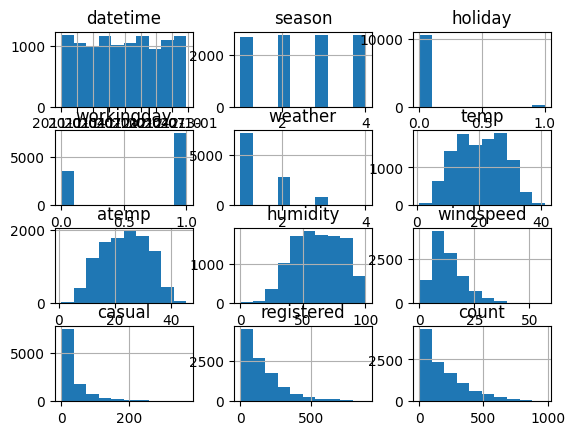

In [18]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [19]:
# create a new feature
train["day"] = train["datetime"].dt.day
test["day"] = test["datetime"].dt.day

train["hour"] = train["datetime"].dt.hour
test["hour"] = test["datetime"].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [20]:
train = pd.get_dummies(train, columns=['season'], prefix='season')

In [21]:
train = pd.get_dummies(train, columns=['weather'], prefix='weather')
test = pd.get_dummies(test, columns=['season'], prefix='season')
test = pd.get_dummies(test, columns=['weather'], prefix='weather')

In [22]:
# View are new feature
train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,True,False,False,False,True,False,False,False
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,1,True,False,False,False,True,False,False,False
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,2,True,False,False,False,True,False,False,False
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,3,True,False,False,False,True,False,False,False
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,4,True,False,False,False,True,False,False,False


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>]], dtype=object)

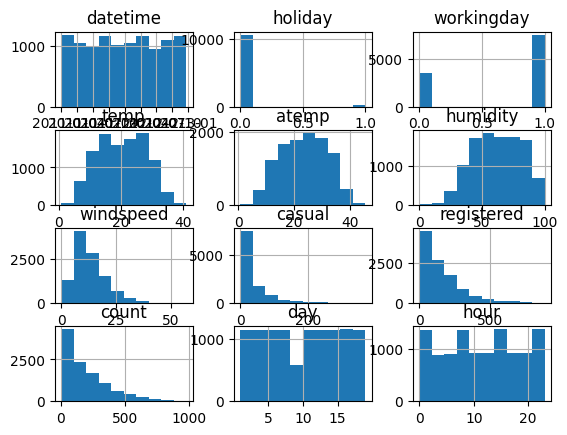

In [23]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [24]:
predictor_new_features = TabularPredictor(label="count",
                             eval_metric ="root_mean_squared_error").fit(train_data=train.drop(columns=["casual","registered"]),
                                                                                       presets='best_quality',
                                                                                       time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20250529_143420"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.72 GB / 12.67 GB (84.6%)
Disk Space Avail:   62.70 GB / 107.72 GB (58.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [25]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.586848  root_mean_squared_error      25.483993  396.629458                0.001112           0.049613            3       True         11
1          LightGBM_BAG_L2  -30.830808  root_mean_squared_error      23.414982  302.575845                0.565538          41.282408            2       True          9
2        LightGBMXT_BAG_L2  -31.495780  root_mean_squared_error      24.139992  305.283846                1.290548          43.990409            2       True          8
3   RandomForestMSE_BAG_L2  -32.068014  root_mean_squared_error      23.626795  311.307028                0.777351          50.013591            2       True         10
4      WeightedEnsemble_L2  -32.402086  root_mean_squared_error      22.783954  261.270158   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.94623815289717,
  'LightGBM_BAG_L1': -33.912432656179234,
  'RandomForestMSE_BAG_L1': -38.50760158233757,
  'CatBoost_BAG_L1': -35.021379456639295,
  'WeightedEnsemble_L2': -32.4020864992878,
  'LightGBMXT_BAG_L2': -31.49578021946545,
  'LightGBM_BAG_L2': -30.8308083

In [26]:
prediction_new_features = predictor_new_features.predict(test)

In [27]:
prediction_new_features.head()

,count
0,16.071003
1,9.523583
2,8.870289
3,7.572777
4,6.718483


In [28]:
prediction_new_features.describe()

,count
count,6493.000000
mean,164.330917
std,145.283569
min,1.878795
25%,49.355419
50%,128.082932
75%,233.678436
max,804.334656


In [29]:
# Remember to set all negative values to zero
prediction_new_features = prediction_new_features.apply(lambda x: max(0, x))

In [30]:
# Same submitting predictions
submission_new_features = pd.read_csv("/content/sampleSubmission.csv", parse_dates=["datetime"])
submission_new_features["count"] = prediction_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [31]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 243k/243k [00:00<00:00, 610kB/s]
Successfully submitted to Bike Sharing Demand

In [32]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-05-29 14:52:15.750000  new features                       SubmissionStatus.COMPLETE  0.61140      0.61140       
submission.csv               2025-05-29 14:33:34.813000  first raw submission               SubmissionStatus.COMPLETE  1.80790      1.80790       
submission.csv               2025-05-29 13:49:53.050000  first raw submission               SubmissionStatus.COMPLETE  1.80351      1.80351       
submission_new_hpo2.csv      2025-05-28 23:46:18.413000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.47796      0.47796       


#### New Score of `0.61140`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

***hpo1***

In [33]:
predictor_new_hpo1 = TabularPredictor(label="count",
                             eval_metric ="root_mean_squared_error").fit(train_data=train.drop(columns=["casual","registered"]),
                                                                         presets='best_quality',
                                                                         time_limit=600,
                                                                         hyperparameters='multimodal')

No path specified. Models will be saved in: "AutogluonModels/ag-20250529_145235"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.72 GB / 12.67 GB (84.6%)
Disk Space Avail:   61.99 GB / 107.72 GB (57.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [34]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -32.364468  root_mean_squared_error      28.119556  314.393353                0.001022           0.036963            3       True          9
1  WeightedEnsemble_L2 -32.496143  root_mean_squared_error      27.928271  256.530228                0.000787           0.014630            2       True          4
2      CatBoost_BAG_L2 -32.621999  root_mean_squared_error      28.002734  295.930966                0.075250          39.415368            2       True          7
3      LightGBM_BAG_L2 -33.021497  root_mean_squared_error      28.021734  290.259024                0.094250          33.743426            2       True          5
4       XGBoost_BAG_L2 -33.279667  root_mean_squared_error      28.043284  274.941021                0.115800         

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -33.912432656179234,
  'LightGBMXT_BAG_L1': -34.94623815289717,
  'CatBoost_BAG_L1': -34.16707241652587,
  'WeightedEnsemble_L2': -32.49614300998492,
  'LightGBM_BAG_L2': -33.021497450471884,
  'LightGBMXT_BAG_L2': -33.80522929323002,
  'CatBoost_BAG_L2': -32.62199908260184,
  'XGBoost_BAG_L2': -33.279666558018306,
  'WeightedEnsemble_L3': -32.36446790636501},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1': ['LightGBM_BAG_L1'],
  'LightGBMXT_BAG_L1': [

In [35]:
prediction_new_hpo1 = predictor_new_hpo1.predict(test)
prediction_new_hpo1.describe()

,count
count,6493.000000
mean,190.630905
std,173.241043
min,-8.110319
25%,45.815086
50%,149.392960
75%,282.663635
max,886.593201


In [36]:
# Remember to set all negative values to zero
prediction_new_hpo1 = prediction_new_hpo1.apply(lambda x: max(0, x))

In [37]:
# Same submitting predictions
submission_new_hpo1 = pd.read_csv("/content/sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo1["count"] = prediction_new_hpo1
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

In [38]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters"

100% 242k/242k [00:00<00:00, 602kB/s]
Successfully submitted to Bike Sharing Demand

In [39]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo1.csv      2025-05-29 15:04:05.180000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.49308      0.49308       
submission_new_features.csv  2025-05-29 14:52:15.750000  new features                       SubmissionStatus.COMPLETE  0.61140      0.61140       
submission.csv               2025-05-29 14:33:34.813000  first raw submission               SubmissionStatus.COMPLETE  1.80790      1.80790       
submission.csv               2025-05-29 13:49:53.050000  first raw submission               SubmissionStatus.COMPLETE  1.80351      1.80351       


#### New Score of `0.49308`

***hpo2***

In [40]:
predictor_new_hpo2 = TabularPredictor(label="count",
                             eval_metric ="root_mean_squared_error").fit(train_data=train.drop(columns=["casual","registered"]),
                                                                                       presets='best_quality',
                                                                                       time_limit=600,
                                                                                       num_bag_folds=5,num_bag_sets=10, num_stack_levels=2)

No path specified. Models will be saved in: "AutogluonModels/ag-20250529_150553"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.64 GB / 12.67 GB (83.9%)
Disk Space Avail:   61.80 GB / 107.72 GB (57.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=5, num_bag_sets=10
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will b

In [41]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      LightGBMXT_BAG_L1  -34.810484  root_mean_squared_error      71.167013  370.131735               71.167013         370.131735            1       True          3
1    WeightedEnsemble_L4  -34.810484  root_mean_squared_error      71.168049  370.154595                0.001036           0.022860            4       True          5
2    WeightedEnsemble_L2  -34.810484  root_mean_squared_error      71.168147  370.165002                0.001134           0.033267            2       True          4
3  KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.100034    0.050922                0.100034           0.050922            1       True          2
4  KNeighborsUnif_BAG_L1 -101.546199  root_mean_squared_error       0.086984    0.046800               

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'WeightedEnsemble_L4': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.81048374839626,
  'WeightedEnsemble_L2': -34.81048374839626,
  'WeightedEnsemble_L4': -34.81048374839626},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],
  'LightGBMXT_BAG_L1': ['LightGBMXT_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'WeightedEnsemble_L4': ['WeightedEnsemble_L4']},
 'model_fit_times': {'KNeighborsUnif_BAG_L1': 0.04680013656616211,
  'KNeighborsDist_BAG_L1': 0.05092191696166992,
  'LightGBMXT_BAG_L1': 370.13173508644104,
  'Weig

In [42]:
prediction_new_hpo2 = predictor_new_hpo2.predict(test)
prediction_new_hpo2.describe()

,count
count,6493.000000
mean,190.380600
std,172.441772
min,-19.255070
25%,46.163506
50%,151.579468
75%,282.855225
max,885.406799


In [43]:
# Remember to set all negative values to zero
prediction_new_hpo2 = prediction_new_hpo2.apply(lambda x: max(0, x))
# Same submitting predictions
submission_new_hpo2 = pd.read_csv("/content/sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo2["count"] = prediction_new_hpo2
submission_new_hpo2.to_csv("submission_new_hpo2.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo2.csv -m "new features with hyperparameters"

100% 240k/240k [00:00<00:00, 382kB/s]
Successfully submitted to Bike Sharing Demand

In [44]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo2.csv      2025-05-29 15:19:01.940000  new features with hyperparameters  SubmissionStatus.PENDING                              
submission_new_hpo1.csv      2025-05-29 15:04:05.180000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.49308      0.49308       
submission_new_features.csv  2025-05-29 14:52:15.750000  new features                       SubmissionStatus.COMPLETE  0.61140      0.61140       
submission.csv               2025-05-29 14:33:34.813000  first raw submission               SubmissionStatus.COMPLETE  1.80790      1.80790       


#### New Score of `0.58638`

***hpo3***

In [45]:
hyperparameters = {
    'GBM': {'extra_trees': True, 'ag_args': {'name_suffix': 'ExtraTrees'}},
    'CAT': {'iterations': 500},
}

In [47]:
predictor_new_hpo3 = TabularPredictor(label="count",
                             eval_metric ="root_mean_squared_error").fit(train_data=train.drop(columns=["casual","registered"]),
                                                                                       presets='best_quality',
                                                                                       time_limit=600,
                                                                                       hyperparameters=hyperparameters)

No path specified. Models will be saved in: "AutogluonModels/ag-20250529_152010"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.57 GB / 12.67 GB (83.4%)
Disk Space Avail:   61.56 GB / 107.72 GB (57.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [48]:
predictor_new_hpo3.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3 -33.226771  root_mean_squared_error      18.284295  176.452016                0.000969           0.024080            3       True          6
1            CatBoost_BAG_L2 -33.360443  root_mean_squared_error      18.283325  176.427936                0.076208          33.583117            2       True          5
2        WeightedEnsemble_L2 -34.112652  root_mean_squared_error      18.208272  142.862709                0.001155           0.017890            2       True          3
3  LightGBMExtraTrees_BAG_L2 -34.881963  root_mean_squared_error      19.419806  180.914817                1.212689          38.069998            2       True          4
4  LightGBMExtraTrees_BAG_L1 -34.946238  root_mean_squared_error      18.126056  111.535

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMExtraTrees_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMExtraTrees_BAG_L2': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMExtraTrees_BAG_L1': -34.94623815289717,
  'CatBoost_BAG_L1': -38.9813010645974,
  'WeightedEnsemble_L2': -34.11265180839995,
  'LightGBMExtraTrees_BAG_L2': -34.881962948415584,
  'CatBoost_BAG_L2': -33.360442604028776,
  'WeightedEnsemble_L3': -33.22677072476559},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBMExtraTrees_BAG_L1': ['LightGBMExtraTrees_BAG_L1'],
  'CatBoost_BAG_L1': ['CatBoost_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'LightGBMExtraTrees_BAG_L2': ['LightGBMExtraTrees_BAG_L2'],
  'CatBoost_BAG_L2': ['CatBoost_BAG_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},

In [49]:
prediction_new_hpo3 = predictor_new_hpo3.predict(test)
prediction_new_hpo3.describe()

,count
count,6493.000000
mean,190.194519
std,173.452713
min,-1.775668
25%,45.039978
50%,150.313477
75%,280.586639
max,880.611694


In [54]:
# Remember to set all negative values to zero
prediction_new_hpo3 = prediction_new_hpo3.apply(lambda x: max(0, x))
# Same submitting predictions
submission_new_hpo3 = pd.read_csv("/content/sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo3["count"] = prediction_new_hpo3
submission_new_hpo3.to_csv("submission_new_hpo3.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo3.csv -m "new features with hyperparameters 3"

100% 242k/242k [00:00<00:00, 433kB/s]
Successfully submitted to Bike Sharing Demand

In [55]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                          status                     publicScore  privateScore  
---------------------------  --------------------------  -----------------------------------  -------------------------  -----------  ------------  
submission_new_hpo3.csv      2025-05-29 15:31:02.653000  new features with hyperparameters 3  SubmissionStatus.COMPLETE  0.47796      0.47796       
submission_new_hpo3.csv      2025-05-29 15:30:26.670000  new features with hyperparameters 3  SubmissionStatus.COMPLETE  0.58638      0.58638       
submission_new_hpo2.csv      2025-05-29 15:19:01.940000  new features with hyperparameters    SubmissionStatus.COMPLETE  0.58638      0.58638       
submission_new_hpo1.csv      2025-05-29 15:04:05.180000  new features with hyperparameters    SubmissionStatus.COMPLETE  0.49308      0.49308       


#### New Score of `0.47796`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

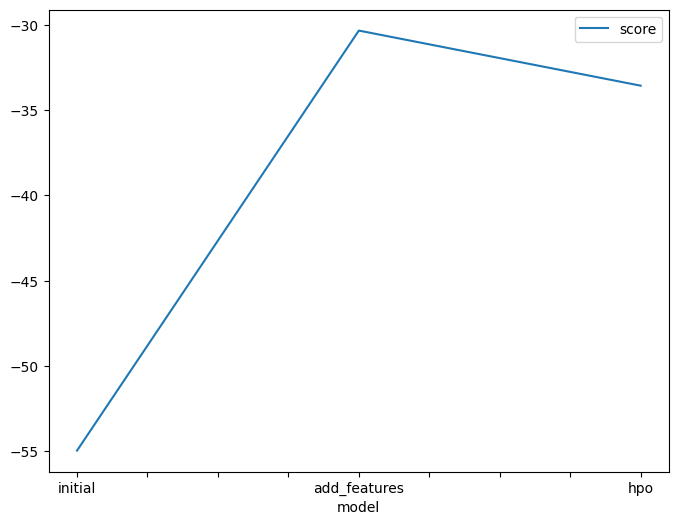

In [56]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-54.963029, -30.341406, -33.570582]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

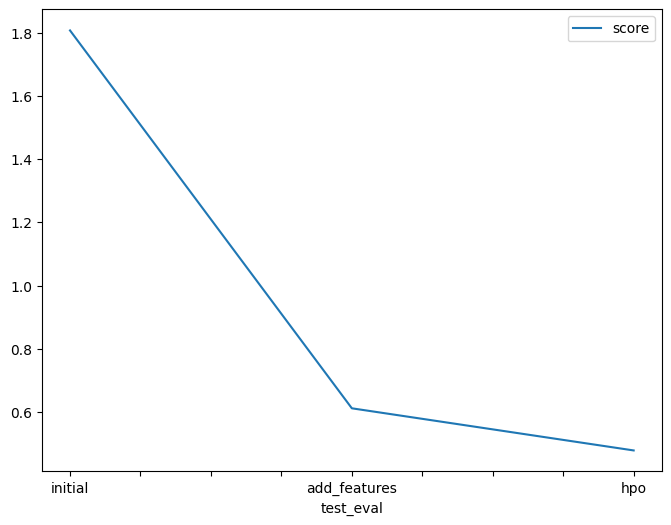

In [57]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80790, 0.61140, 0.47796]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [58]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [None, None, "model type = 'GBM' , 'XGB'"],
    "hpo2": [None, None, "num_bag_folds=5,num_bag_sets=10, num_stack_levels=1"],
    "hpo3": [None, None, "auto_stack = True"],
    "score": [1.80790, 0.61140, 0.47796]
})

,model,hpo1,hpo2,hpo3,score
0,initial,None,None,None,1.80790
1,add_features,None,None,None,0.61140
2,hpo,"model type = 'GBM' , 'XGB'","num_bag_folds=5,num_bag_sets=10, num_stack_lev...",auto_stack = True,0.47796


In [ ]:
%%shell
jupyter nbconvert --to html